In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from transformers import BertTokenizer, BertModel
import torch
from transformers import DistilBertTokenizer, DistilBertModel

In [6]:
data = pd.read_excel("dataset.xlsx")

In [7]:
data.columns 

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Name', 'Role', 'Transcript',
       'Resume', 'decision', 'Reason for decision', 'Job Description',
       'Transcript_processed', 'Resume_processed', 'Job_Description_processed',
       'Transcript_sentiment', 'Resume_sentiment', 'JobDescription_sentiment',
       'Transcript_words', 'Resume_words', 'Years_Experience',
       'resume_jd_similarity', 'Transcript_jd_similarity',
       'resume_transcript_similarity', 'resume_sentence_count',
       'resume_avg_word_length', 'skill_match_count',
       'university_education_count', 'transcript_vocab_diversity',
       'transcript_avg_sentence_length', 'resume_jd_similarity_transformers',
       'transcript_jd_similarity_transformers',
       'transcript_resume_similarity_transformers'],
      dtype='object')

In [8]:
data.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace=True) 
data.columns

Index(['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision',
       'Reason for decision', 'Job Description', 'Transcript_processed',
       'Resume_processed', 'Job_Description_processed', 'Transcript_sentiment',
       'Resume_sentiment', 'JobDescription_sentiment', 'Transcript_words',
       'Resume_words', 'Years_Experience', 'resume_jd_similarity',
       'Transcript_jd_similarity', 'resume_transcript_similarity',
       'resume_sentence_count', 'resume_avg_word_length', 'skill_match_count',
       'university_education_count', 'transcript_vocab_diversity',
       'transcript_avg_sentence_length', 'resume_jd_similarity_transformers',
       'transcript_jd_similarity_transformers',
       'transcript_resume_similarity_transformers'],
      dtype='object')

In [9]:
transcripts = data['Transcript'].tolist()
resumes = data['Resume'].tolist()
job_desc = data['Job Description'].tolist()

In [28]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased") 

In [29]:
def get_bert_embeddings_batch(texts, tokenizer, model, batch_size=32):
    embeddings = []
    total_batches = (len(texts) + batch_size - 1) // batch_size  # Total number of batches
    print(f"Total Batches: {total_batches}")
    for i in range(total_batches):
        # Print progress\n"
        print(f"Processing batch {i + 1}/{total_batches}...")
        # Get the current batch\n",
        batch = texts[i * batch_size:(i + 1) * batch_size]
        inputs = tokenizer(batch, return_tensors='pt', truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        # Use the [CLS] token representation for each text in the batch\n",
        batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy(),
        embeddings.extend(batch_embeddings)
    return embeddings

In [30]:
batch_embeddings = get_bert_embeddings_batch(transcripts, tokenizer, model, batch_size=32)

Total Batches: 93
Processing batch 1/93...
Processing batch 2/93...
Processing batch 3/93...
Processing batch 4/93...
Processing batch 5/93...
Processing batch 6/93...
Processing batch 7/93...
Processing batch 8/93...
Processing batch 9/93...
Processing batch 10/93...
Processing batch 11/93...
Processing batch 12/93...
Processing batch 13/93...
Processing batch 14/93...
Processing batch 15/93...
Processing batch 16/93...
Processing batch 17/93...
Processing batch 18/93...
Processing batch 19/93...
Processing batch 20/93...
Processing batch 21/93...
Processing batch 22/93...
Processing batch 23/93...
Processing batch 24/93...
Processing batch 25/93...
Processing batch 26/93...
Processing batch 27/93...
Processing batch 28/93...
Processing batch 29/93...
Processing batch 30/93...
Processing batch 31/93...
Processing batch 32/93...
Processing batch 33/93...
Processing batch 34/93...
Processing batch 35/93...
Processing batch 36/93...
Processing batch 37/93...
Processing batch 38/93...
Pro

In [31]:
# Flatten the nested batch_embeddings
flat_embeddings = [embedding for batch in batch_embeddings for embedding in batch]
data['bert_embeddings_trans'] = flat_embeddings

In [32]:
batch_embeddings_resume = get_bert_embeddings_batch(resumes, tokenizer, model, batch_size=32)

Total Batches: 93
Processing batch 1/93...
Processing batch 2/93...
Processing batch 3/93...
Processing batch 4/93...
Processing batch 5/93...
Processing batch 6/93...
Processing batch 7/93...
Processing batch 8/93...
Processing batch 9/93...
Processing batch 10/93...
Processing batch 11/93...
Processing batch 12/93...
Processing batch 13/93...
Processing batch 14/93...
Processing batch 15/93...
Processing batch 16/93...
Processing batch 17/93...
Processing batch 18/93...
Processing batch 19/93...
Processing batch 20/93...
Processing batch 21/93...
Processing batch 22/93...
Processing batch 23/93...
Processing batch 24/93...
Processing batch 25/93...
Processing batch 26/93...
Processing batch 27/93...
Processing batch 28/93...
Processing batch 29/93...
Processing batch 30/93...
Processing batch 31/93...
Processing batch 32/93...
Processing batch 33/93...
Processing batch 34/93...
Processing batch 35/93...
Processing batch 36/93...
Processing batch 37/93...
Processing batch 38/93...
Pro

In [33]:
flat_embeddings_res = [embedding for batch in batch_embeddings_resume for embedding in batch]
data['bert_embeddings_resume'] = flat_embeddings_res

In [34]:
batch_embeddings_job_desc = get_bert_embeddings_batch(job_desc, tokenizer, model, batch_size=32)

Total Batches: 93
Processing batch 1/93...
Processing batch 2/93...
Processing batch 3/93...
Processing batch 4/93...
Processing batch 5/93...
Processing batch 6/93...
Processing batch 7/93...
Processing batch 8/93...
Processing batch 9/93...
Processing batch 10/93...
Processing batch 11/93...
Processing batch 12/93...
Processing batch 13/93...
Processing batch 14/93...
Processing batch 15/93...
Processing batch 16/93...
Processing batch 17/93...
Processing batch 18/93...
Processing batch 19/93...
Processing batch 20/93...
Processing batch 21/93...
Processing batch 22/93...
Processing batch 23/93...
Processing batch 24/93...
Processing batch 25/93...
Processing batch 26/93...
Processing batch 27/93...
Processing batch 28/93...
Processing batch 29/93...
Processing batch 30/93...
Processing batch 31/93...
Processing batch 32/93...
Processing batch 33/93...
Processing batch 34/93...
Processing batch 35/93...
Processing batch 36/93...
Processing batch 37/93...
Processing batch 38/93...
Pro

In [35]:
flat_embeddings_jd = [embedding for batch in batch_embeddings_job_desc for embedding in batch]
data['bert_embeddings_jobDesc'] = flat_embeddings_jd

In [36]:
trans_expanded = pd.DataFrame(data['bert_embeddings_trans'].tolist(), index=data.index)
trans_expanded.columns = [f'trans_emb_{i}' for i in range(trans_expanded.shape[1])]

In [37]:
resume_expanded = pd.DataFrame(data['bert_embeddings_resume'].tolist(), index=data.index)
resume_expanded.columns = [f'resume_emb_{i}' for i in range(resume_expanded.shape[1])]

In [38]:
jd_expanded = pd.DataFrame(data['bert_embeddings_jobDesc'].tolist(), index=data.index)
jd_expanded.columns = [f'jd_emb_{i}' for i in range(jd_expanded.shape[1])]

In [39]:
df_expanded = pd.concat([data, trans_expanded, resume_expanded , jd_expanded], axis=1)

In [40]:
df_expanded = df_expanded.drop(columns=['bert_embeddings_trans', 'bert_embeddings_resume','bert_embeddings_jobDesc'])

In [15]:
df_expanded = pd.read_excel('bert_embeddings2.xlsx')

In [27]:
## After Bert Embeddings 

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [17]:
# pip install xgboost

In [42]:
label_encoder = LabelEncoder()
df_expanded['decision_encoded'] = label_encoder.fit_transform(df_expanded['decision'])
# Step 2: Split features and target
# Assuming embeddings columns are named like 'trans_emb_0', 'resume_emb_0', etc.\n",
embedding_columns = [col for col in df_expanded.columns if col.startswith('trans_emb_') or col.startswith('resume_emb_') or col.startswith('jd_emb_')]
X = df_expanded[embedding_columns]
y = df_expanded['decision_encoded']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model = XGBClassifier(use_label_encoder=False,max_depth=5,n_estimators=200,learning_rate=0.1, eval_metric='logloss')
model.fit(X_train, y_train)

In [45]:
y_pred = model.predict(X_test)

In [46]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7922297297297297


In [48]:
print("roc_auc:", roc_auc_score(y_test, y_pred))

roc_auc: 0.7919860627177701


## Combining derived features with  BERT embeddings

In [49]:
data.columns

Index(['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision',
       'Reason for decision', 'Job Description', 'Transcript_processed',
       'Resume_processed', 'Job_Description_processed', 'Transcript_sentiment',
       'Resume_sentiment', 'JobDescription_sentiment', 'Transcript_words',
       'Resume_words', 'Years_Experience', 'resume_jd_similarity',
       'Transcript_jd_similarity', 'resume_transcript_similarity',
       'resume_sentence_count', 'resume_avg_word_length', 'skill_match_count',
       'university_education_count', 'transcript_vocab_diversity',
       'transcript_avg_sentence_length', 'resume_jd_similarity_transformers',
       'transcript_jd_similarity_transformers',
       'transcript_resume_similarity_transformers', 'bert_embeddings_trans',
       'bert_embeddings_resume', 'bert_embeddings_jobDesc'],
      dtype='object')

In [50]:
df_expanded[['Transcript_sentiment','Resume_sentiment', 'JobDescription_sentiment', 'Transcript_words',
       'Resume_words', 'Years_Experience',
       'resume_sentence_count', 'resume_avg_word_length', 'skill_match_count',
       'university_education_count', 'transcript_vocab_diversity',
       'transcript_avg_sentence_length']]

,Transcript_sentiment,Resume_sentiment,JobDescription_sentiment,Transcript_words,Resume_words,Years_Experience,resume_sentence_count,resume_avg_word_length,skill_match_count,university_education_count,transcript_vocab_diversity,transcript_avg_sentence_length
0,0.270412,0.307407,0.50,348,221,14,1,7.737557,8,2,0.548851,348
1,0.296350,0.130833,0.50,387,241,11,1,7.676349,7,2,0.591731,387
2,0.173791,0.202970,0.50,282,255,14,1,7.117647,9,1,0.475177,282
3,0.198376,0.131515,0.50,402,237,7,1,7.130802,7,1,0.519900,402
4,0.324771,0.111750,0.25,306,299,0,1,7.394649,9,2,0.522876,306
...,...,...,...,...,...,...,...,...,...,...,...,...
2953,0.265649,0.107810,0.00,366,326,6,1,7.263804,4,2,0.609290,366
2954,0.223822,0.130000,0.00,437,309,0,1,7.482201,4,2,0.494279,437
2955,0.091538,0.146667,0.00,441,290,1,1,7.665517,6,2,0.428571,441
2956,0.220782,0.093155,0.00,444,373,8,1,7.624665,4,2,0.495495,444


### Calculating the similarity between transcript , resume , job description using the BERT embeddings

In [51]:
# Resume and Transcript similarity using Bert embeddings 
from sklearn.metrics.pairwise import cosine_similarity
tra_res_simi = []
for tra , res in zip(flat_embeddings , flat_embeddings_res):
    tra_res_simi.append(cosine_similarity([tra],[res])[0][0])

In [52]:
tra_jd_simi = []
for tra , jd in zip(flat_embeddings , flat_embeddings_jd):
    tra_jd_simi.append(cosine_similarity([tra],[jd])[0][0])

In [53]:
jd_res_simi = []
for jd , res in zip(flat_embeddings_jd , flat_embeddings_res):
    jd_res_simi.append(cosine_similarity([jd],[res])[0][0])

In [54]:
df_expanded['Bert_TransRes_Similarity'] = tra_res_simi
df_expanded['Bert_TransJobDesc_Similarity'] = tra_jd_simi
df_expanded['Bert_ResJobDesc_Similarity'] = jd_res_simi 

In [55]:
derived_features = df_expanded[['Transcript_sentiment','Resume_sentiment', 'JobDescription_sentiment', 'Transcript_words',
       'Resume_words', 'Years_Experience', 'resume_avg_word_length', 'skill_match_count','university_education_count', 'transcript_vocab_diversity',
       'transcript_avg_sentence_length' , 'Bert_TransRes_Similarity', 'Bert_TransJobDesc_Similarity' , 'Bert_ResJobDesc_Similarity']]

In [56]:
## Merging the entire data 

In [57]:
new_data = pd.concat([X,derived_features],axis=1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model1 = XGBClassifier(use_label_encoder=False,max_depth=5,n_estimators=200,learning_rate=0.1, eval_metric='logloss')
model1.fit(X_train, y_train)

In [60]:
y_pred = model1.predict(X_test)

In [61]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("roc_auc:", roc_auc_score(y_test, y_pred))

Accuracy:  0.8040540540540541
roc_auc: 0.8033586565373849


In [175]:
## Creating another model using other parameters 

In [62]:
model2 = XGBClassifier(use_label_encoder=False,max_depth=10,n_estimators=500,learning_rate=0.1, eval_metric='logloss')
model2.fit(X_train, y_train)

c:\Users\heman\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:37:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [89]:
y_pred = model2.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("roc_auc:", roc_auc_score(y_test, y_pred))

Accuracy:  0.8108108108108109
roc_auc: 0.8108413777346204


In [63]:
## Using Optuna for parameter Tuning 
# Split the data
X_train_full, X_test, y_train_full, y_test = train_test_split(new_data, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

### Hyper parameter tuning in Xgboost model using Optuna 

In [65]:
import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

In [66]:
def objective(trial):
    # Define the hyperparameters to tune
    param_grid = {
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=50),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 10),
    }

    # Create the model
    model3 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **param_grid)

    # Train on the training set
    model3.fit(X_train, y_train)

    # Evaluate on the validation set
    val_accuracy = model3.score(X_val, y_val)
    return val_accuracy

In [67]:
# Create a study
study = optuna.create_study(direction='maximize')

# Run the optimization
study.optimize(objective, n_trials=5, timeout=3600)  # 5 trials or 1 hour

# Print the best hyperparameters
print("Best Hyperparameters:", study.best_params)

[I 2025-01-23 22:40:22,755] A new study created in memory with name: no-name-22714512-33f7-469f-a99f-650b1cce9d8a
c:\Users\heman\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:40:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-01-23 22:40:38,004] Trial 0 finished with value: 0.8059071729957806 and parameters: {'max_depth': 10, 'n_estimators': 400, 'learning_rate': 0.22345121212982516, 'subsample': 0.8640254476674822, 'colsample_bytree': 0.9536748532340815, 'gamma': 0.8382143051929092}. Best is trial 0 with value: 0.8059071729957806.
c:\Users\heman\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:40:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xg

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 100, 'learning_rate': 0.1968650769334202, 'subsample': 0.8243398530968078, 'colsample_bytree': 0.6809928963641454, 'gamma': 2.7130350828263605}


In [68]:
best_params = study.best_params
model3 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **best_params)
model3.fit(X_train, y_train)

# Evaluate the model
accuracy = model3.score(X_test, y_test)
y_pred = model3.predict(X_test)
print(f"Test Accuracy: {accuracy}")
print("roc_auc:", roc_auc_score(y_test, y_pred))

c:\Users\heman\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:43:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.7989864864864865
roc_auc: 0.7995643075234141


## Building ANN

In [94]:
## Using the ANN for predictions 

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [70]:
model = Sequential([
    # Input layer
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Normalize inputs for faster convergence
    Dropout(0.1),  # Dropout to prevent overfitting

    # Hidden layers
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    # Output layer
    Dense(1, activation='sigmoid')  # For binary classification
])


c:\Users\heman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # For binary classification
    metrics=['accuracy']
)


In [72]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,  # Increase max epochs for deeper models
    batch_size=8,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7140 - loss: 0.5795 - val_accuracy: 0.7678 - val_loss: 0.4523
Epoch 2/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7647 - loss: 0.4795 - val_accuracy: 0.7995 - val_loss: 0.4135
Epoch 3/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7804 - loss: 0.4174 - val_accuracy: 0.8100 - val_loss: 0.4538
Epoch 4/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7958 - loss: 0.4163 - val_accuracy: 0.8206 - val_loss: 0.4047
Epoch 5/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8198 - loss: 0.3826 - val_accuracy: 0.6570 - val_loss: 0.6454
Epoch 6/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8166 - loss: 0.3815 - val_accuracy: 0.7573 - val_loss: 0.4615
Epoch 7/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8283 - loss: 0.3656 - val_accuracy: 0.7836 - val_loss: 0.3584
Epoch 8/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7869 - loss: 0.4071 - val_accuracy: 0.

In [73]:
y_test_pred_nn = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [74]:
y_test_pred_nn = [i[0] for i in y_test_pred_nn]

## Building Ensemble using the xgboost predictions , ANN predictions

In [75]:
y_test_pred_proba_xgb = model2.predict_proba(X_test)[:, 1]

In [76]:
test_df = pd.DataFrame()
test_df['actuals'] = y_test
test_df['xgb_pred'] = y_test_pred_proba_xgb
test_df['nn_pred'] = y_test_pred_nn

In [77]:
test_df

,actuals,xgb_pred,nn_pred
2012,0,0.000142,0.007421
1688,0,0.006828,0.545954
764,0,0.000087,0.005635
2057,0,0.000332,0.027185
2025,0,0.000122,0.004589
...,...,...,...
809,0,0.000018,0.002083
691,0,0.000025,0.001726
1188,0,0.000501,0.015772
2798,1,0.982947,0.874089


In [78]:
test_df['mean_prob'] = (test_df['xgb_pred'] + test_df['nn_pred']) / 2

In [79]:
test_df['ensemble'] = test_df['mean_prob'].round()

In [80]:
accuracy_score(test_df['ensemble'] , test_df['actuals'])

0.9527027027027027

## bi-LSTM model  without using the derived features 

In [81]:
train_lstm = X_train.drop(columns = ['Transcript_sentiment','Resume_sentiment', 'JobDescription_sentiment', 'Transcript_words',
       'Resume_words', 'Years_Experience', 'resume_avg_word_length', 'skill_match_count','university_education_count', 'transcript_vocab_diversity',
       'transcript_avg_sentence_length' , 'Bert_TransRes_Similarity', 'Bert_TransJobDesc_Similarity' , 'Bert_ResJobDesc_Similarity'])

val_lstm = X_val.drop(columns = ['Transcript_sentiment','Resume_sentiment', 'JobDescription_sentiment', 'Transcript_words',
       'Resume_words', 'Years_Experience', 'resume_avg_word_length', 'skill_match_count','university_education_count', 'transcript_vocab_diversity',
       'transcript_avg_sentence_length' , 'Bert_TransRes_Similarity', 'Bert_TransJobDesc_Similarity' , 'Bert_ResJobDesc_Similarity'])

test_lstm = X_test.drop(columns = ['Transcript_sentiment','Resume_sentiment', 'JobDescription_sentiment', 'Transcript_words',
       'Resume_words', 'Years_Experience', 'resume_avg_word_length', 'skill_match_count','university_education_count', 'transcript_vocab_diversity',
       'transcript_avg_sentence_length' , 'Bert_TransRes_Similarity', 'Bert_TransJobDesc_Similarity' , 'Bert_ResJobDesc_Similarity'])

In [82]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional


In [83]:
# Reshape the input to add a "timesteps" dimension
train_lstm_reshaped = train_lstm.values.reshape((train_lstm.shape[0], 1, train_lstm.shape[1]))
val_lstm_reshaped = val_lstm.values.reshape((val_lstm.shape[0], 1, val_lstm.shape[1]))

# Build the Bi-LSTM model
model4 = Sequential()
model4.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(1, train_lstm.shape[1])))  # First Bi-LSTM layer
model4.add(Bidirectional(LSTM(64, return_sequences=False)))  # Second Bi-LSTM layer
model4.add(Dropout(0.3))  # Dropout for regularization
model4.add(Dense(64, activation='relu'))  # Fully connected layer
model4.add(Dense(64, activation='relu'))  # Another fully connected layer
model4.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model4.summary()

# Train the model with reshaped data
history = model4.fit(
    train_lstm_reshaped, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(val_lstm_reshaped, y_val)
)


c:\Users\heman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 1, 256)         │     2,491,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,668,225 (10.18 MB)

 Trainable params: 2,668,225 (10.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6055 - loss: 0.6121 - val_accuracy: 0.7574 - val_loss: 0.4362
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8184 - loss: 0.3439 - val_accuracy: 0.8017 - val_loss: 0.3269
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8152 - loss: 0.3047 - val_accuracy: 0.7764 - val_loss: 0.4381
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8044 - loss: 0.3063 - val_accuracy: 0.8059 - val_loss: 0.3129
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8343 - loss: 0.2700 - val_accuracy: 0.7489 - val_loss: 0.4470
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8236 - loss: 0.2760 - val_accuracy: 0.8101 - val_loss: 0.2887
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8242 - loss: 0.2597 - val_accuracy: 0.7722 - val_loss: 0.3534
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8236 - loss: 0.2939 - val_accuracy: 0.7932 - 

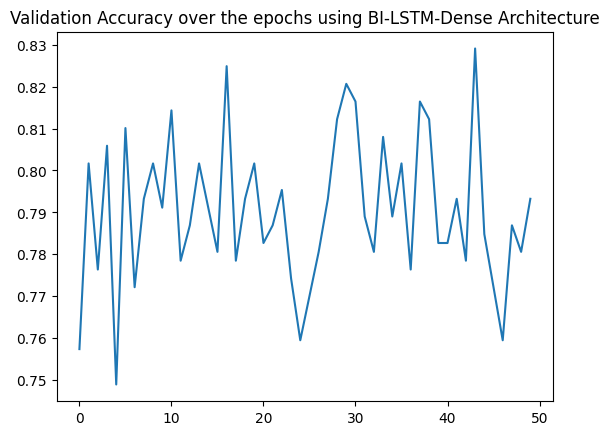

In [86]:
plt.plot(history.history['val_accuracy'])
plt.title("Validation Accuracy over the epochs using BI-LSTM-Dense Architecture")
plt.show()

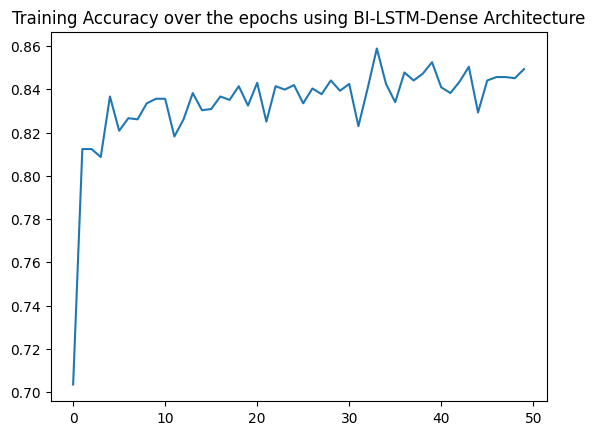

In [87]:
plt.plot(history.history['accuracy'])
plt.title("Training Accuracy over the epochs using BI-LSTM-Dense Architecture")
plt.show()

In [104]:
## Reshaping the test data for giving to LSTM
test_lstm_reshaped = test_lstm.values.reshape((test_lstm.shape[0], 1, test_lstm.shape[1])) 

In [105]:
lstm_preds = model4.predict(test_lstm_reshaped)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [154]:
## Ensemble for 3 models 

In [90]:
preds_df = test_df.copy()

In [91]:
preds_df.columns

Index(['actuals', 'xgb_pred', 'nn_pred', 'mean_prob', 'ensemble'], dtype='object')

In [106]:
## Creating the new frame with only xgb_preds , nn_preds , lstm_preds , actuals 
preds_df = preds_df[['actuals','xgb_pred','nn_pred']]
preds_df['bi-lstm_pred'] = lstm_preds

In [107]:
preds_df.head()

,actuals,xgb_pred,nn_pred,bi-lstm_pred
2012,0,0.000142,0.007421,0.000091
1688,0,0.006828,0.545954,0.529866
764,0,0.000087,0.005635,0.000064
2057,0,0.000332,0.027185,0.000305
2025,0,0.000122,0.004589,0.000285


In [108]:
## Building 2 different types of ensembles 
#       1. Maximum Voting Classifier 
#       2. Average Prediction classifier 

In [110]:
preds_df['xgb_class'] = (preds_df['xgb_pred'] > 0.5).astype(int)
preds_df['nn_class'] = (preds_df['nn_pred'] > 0.5).astype(int)
preds_df['bi-lstm_class'] = (preds_df['bi-lstm_pred'] > 0.5).astype(int)

In [111]:
preds_df['max_vote_class'] = preds_df[['xgb_class', 'nn_class', 'bi-lstm_class']].mode(axis=1)[0]

In [ ]:
accuracy = accuracy_score(preds_df['actuals'], preds_df['max_vote_class'])
print(f"Final Accuracy: {accuracy}")

In [114]:
# Average voting classifier 
preds_df['mean_prob'] = (preds_df['xgb_pred'] + preds_df['nn_pred'] + preds_df['bi-lstm_pred'])/3

In [115]:
preds_df['mean_class'] = preds_df['mean_prob'].round()

In [ ]:
accuracy = accuracy_score(preds_df['actuals'], preds_df['mean_class'])
print(f"Final Accuracy: {accuracy}")